<a href="https://colab.research.google.com/github/tassiogomes/MINDD-ISEP/blob/main/MINDD_PL02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Start to load the dataset week_purchases18-25.txt into R session and next:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/My Drive/MINDD/week_purchases18-25.txt', sep='\t')
df.head()



Mounted at /content/drive


,Username,TitleCli,Name,Address,Country,Gender,Age,Favourites,Order_ID,Product_ID,Style,Film_Title,Price,PurchTime,PurchDate,Buy_for
0,user_1000884,MRS,DORIS126855,89594388-Boris Road-Doris Town,USA,F,27.0,Adventure,Order_ID_25002281,1048,Comedy,This was Tinny Sap,9.99,23:50:02,25/02/2001,Myself
1,user_1009862,MRS,DORIS42531,75844730-Boris Road-Doris Town,UK,F,36.0,Children,Order_ID_11048478,1060,Children,The Buppets,5.99,23:40:18,22/02/2001,Family
2,user_1025298,MISS,DORIS136770,39704306-Boris Road-Doris Town,UK,F,38.0,Children,Order_ID_62493972,1062,Children,Bogus the Clown,5.99,08:37:27,21/02/2001,Family
3,user_1039001,MR,BORIS111529,46627181-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_40324890,1048,Comedy,This was Tinny Sap,9.99,20:17:16,25/02/2001,NaN
4,user_1040891,MRS,DORIS142154,82645107-Boris Road-Doris Town,USA,F,25.0,Adventure,Order_ID_79222013,1013,Comedy,Dr OddBloke or: What bomb? Where?,15.99,21:12:49,22/02/2001,Myself


In [ ]:
# a. check its size
print(df.shape)
print("Linhas", df.shape[0])
print("Colunas", df.shape[1])
print(df.columns.to_list())

(739, 16)
Linhas 739
Colunas 16
['Username', 'TitleCli', 'Name', 'Address', 'Country', 'Gender', 'Age', 'Favourites', 'Order_ID', 'Product_ID', 'Style', 'Film_Title', 'Price', 'PurchTime', 'PurchDate', 'Buy_for']


In [ ]:
# b. get a summary of data
print(df.describe())

              Age   Product_ID       Price
count  444.000000   739.000000  739.000000
mean    43.182432  1039.170501    8.742368
std     14.657891    17.813339    2.879627
min     21.000000  1001.000000    5.990000
25%     32.000000  1024.000000    5.990000
50%     37.000000  1042.000000    7.990000
75%     58.000000  1056.000000    9.990000
max     75.000000  1062.000000   15.990000


In [ ]:
# c. check which columns are numeric and which are categorical
df.dtypes
# convert age float64 to integer
df['Age'] = df['Age'].fillna(0).astype(int) # fillna(0) put 0 in missing values
# purchase time objetc to time
#df['PurchTime'] = pd.to_datetime(df['PurchTime'])
# Converting date objetc to datetime
df['PurchDate'] = pd.to_datetime(df['PurchDate'])
df.dtypes

Username              object
TitleCli              object
Name                  object
Address               object
Country               object
Gender                object
Age                    int64
Favourites            object
Order_ID              object
Product_ID             int64
Style                 object
Film_Title            object
Price                float64
PurchTime             object
PurchDate     datetime64[ns]
Buy_for               object
dtype: object

In [ ]:
# d. check for missing data by rows and by columns
df.isnull().sum(axis = 0)

Username        0
TitleCli        0
Name            0
Address         0
Country       295
Gender        295
Age             0
Favourites    295
Order_ID        0
Product_ID      0
Style           0
Film_Title      0
Price           0
PurchTime       0
PurchDate       0
Buy_for       295
dtype: int64

## 2. Using the appropriate graphs, analyse the various attributes of the data set and make necessary corrections to the data.:

#### Title Client

###### check client data, tabs before the title

In [6]:
#Tabs before MRS, Miss and MR
title_counts = df['TitleCli'].value_counts().reset_index()
title_counts.columns = ['Title', 'Count']
print(title_counts)


     Title  Count
0     MR      186
1    MRS      156
2      MR     140
3   MISS       99
4     MRS      92
5    MISS      66


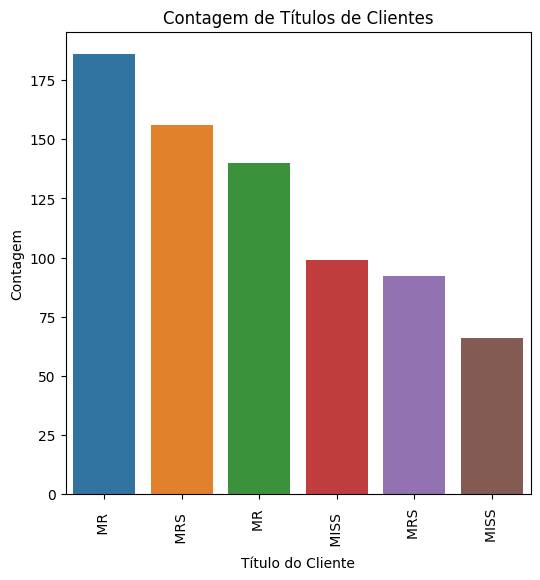

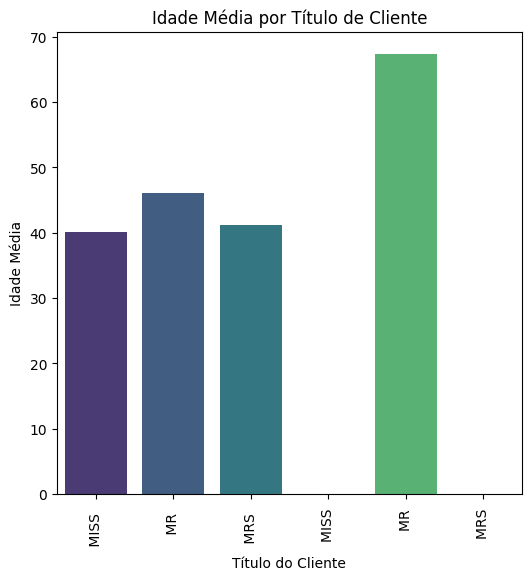

In [2]:
# a. Title Client
import matplotlib.pyplot as plt
import seaborn as sns

title_counts = df['TitleCli'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=title_counts.index, y=title_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Título do Cliente')
plt.ylabel('Contagem')
plt.title('Contagem de Títulos de Clientes')
plt.show()

# Agrupe os dados por título de cliente e calcule a média da idade
title_age_mean = df.groupby('TitleCli')['Age'].mean().reset_index()

# Crie um gráfico de barras
plt.figure(figsize=(6, 6))
sns.barplot(x='TitleCli', y='Age', data=title_age_mean, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Título do Cliente')
plt.ylabel('Idade Média')
plt.title('Idade Média por Título de Cliente')
plt.show()

###### After remove tabs

In [8]:
# Removing Tabs
title_counts = df['TitleCli'].value_counts().reset_index()
#df['TitleCli'] = df['TitleCli'].str.strip() # remove spaces
df['TitleCli'] = df['TitleCli'].str.replace(r'^\s+|\s+?$', '', regex=True) # remove tabs

print(title_counts)

  index  TitleCli
0    MR       326
1   MRS       248
2  MISS       165


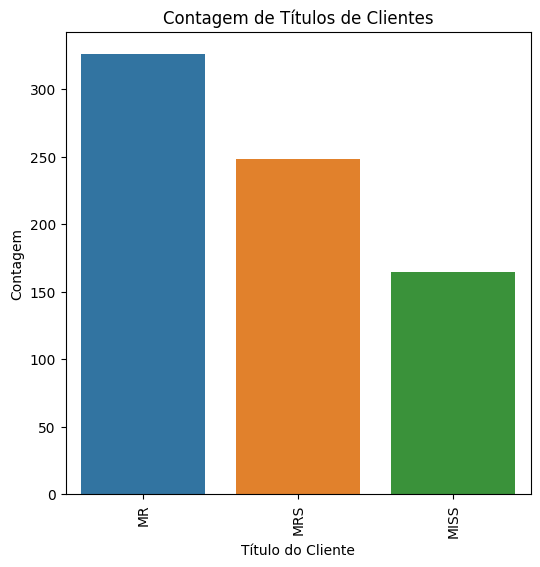

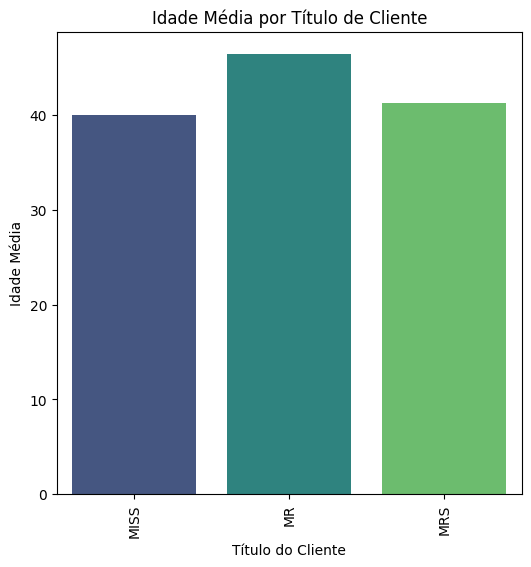

In [9]:
# a. Title Client
import matplotlib.pyplot as plt
import seaborn as sns

title_counts = df['TitleCli'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=title_counts.index, y=title_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Título do Cliente')
plt.ylabel('Contagem')
plt.title('Contagem de Títulos de Clientes')
plt.show()

# Agrupe os dados por título de cliente e calcule a média da idade
title_age_mean = df.groupby('TitleCli')['Age'].mean().reset_index()

# Crie um gráfico de barras
plt.figure(figsize=(6, 6))
sns.barplot(x='TitleCli', y='Age', data=title_age_mean, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Título do Cliente')
plt.ylabel('Idade Média')
plt.title('Idade Média por Título de Cliente')
plt.show()

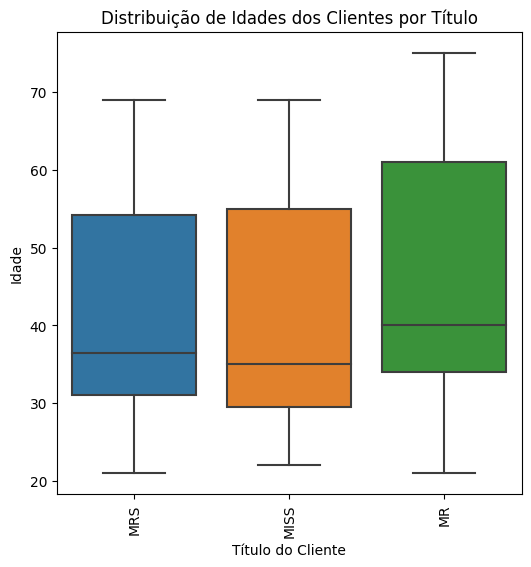

In [10]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='TitleCli', y='Age', data=df)
plt.xticks(rotation=90)
plt.xlabel('Título do Cliente')
plt.ylabel('Idade')
plt.title('Distribuição de Idades dos Clientes por Título')
plt.show()


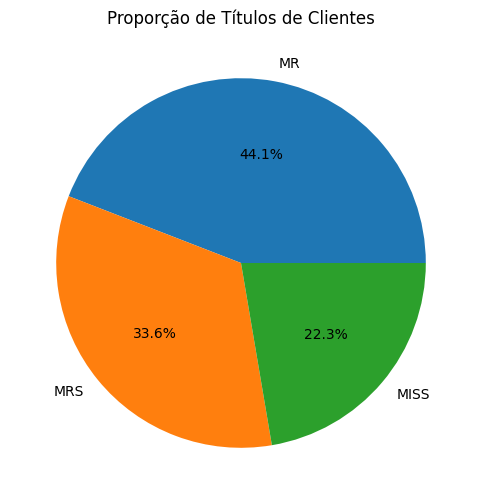

In [11]:
plt.figure(figsize=(6, 6))
title_proportions = df['TitleCli'].value_counts()
plt.pie(title_proportions, labels=title_proportions.index, autopct='%1.1f%%')
plt.title('Proporção de Títulos de Clientes')
plt.show()


#### b. Gender

###### **Before** fill NaN values

In [23]:
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts = df['Gender'].value_counts(dropna=False)
gender_counts2 = df.astype(str)['Gender'].value_counts() # alternative
gender_counts.columns = ['Gender', 'Count']
print(gender_counts)

M    574
F    165
Name: Gender, dtype: int64


###### **After** fill NaN values

In [22]:
df.loc[df['TitleCli'].str.startswith('MRS') | df['TitleCli'].str.startswith('MR'), 'Gender'] = 'M'
df.loc[df['TitleCli'].str.startswith('MISS'), 'Gender'] = 'F'

In [ ]:
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts = df['Gender'].value_counts(dropna=False)
gender_counts2 = df.astype(str)['Gender'].value_counts() # alternative
gender_counts.columns = ['Gender', 'Count']
print(gender_counts)

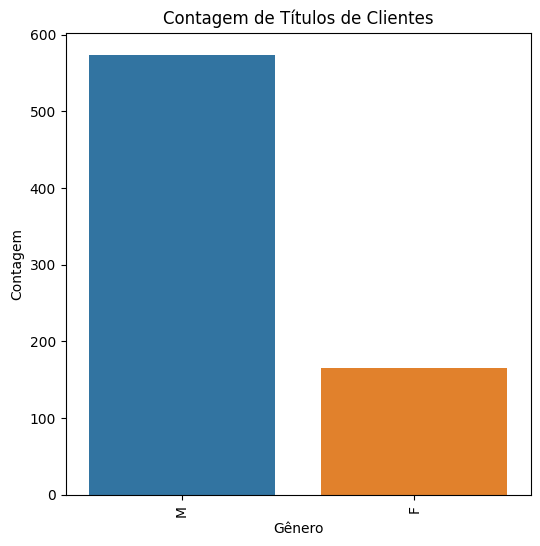

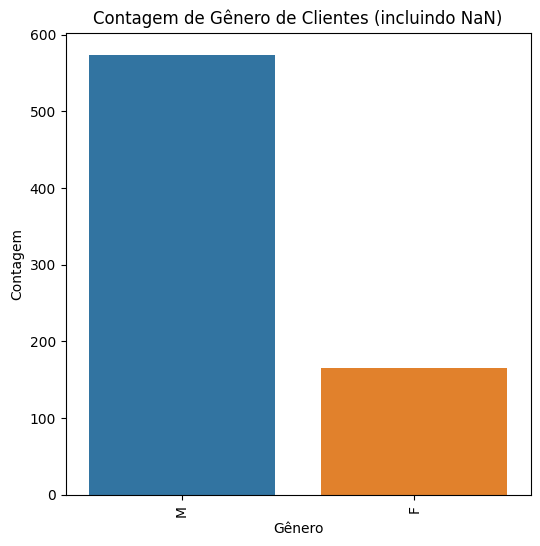

In [24]:
title_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=title_counts.index, y=title_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Contagem de Títulos de Clientes')
plt.show()

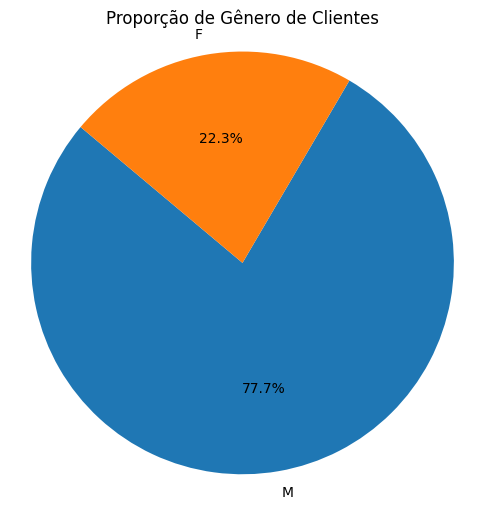

In [25]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proporção de Gênero de Clientes')
plt.show()

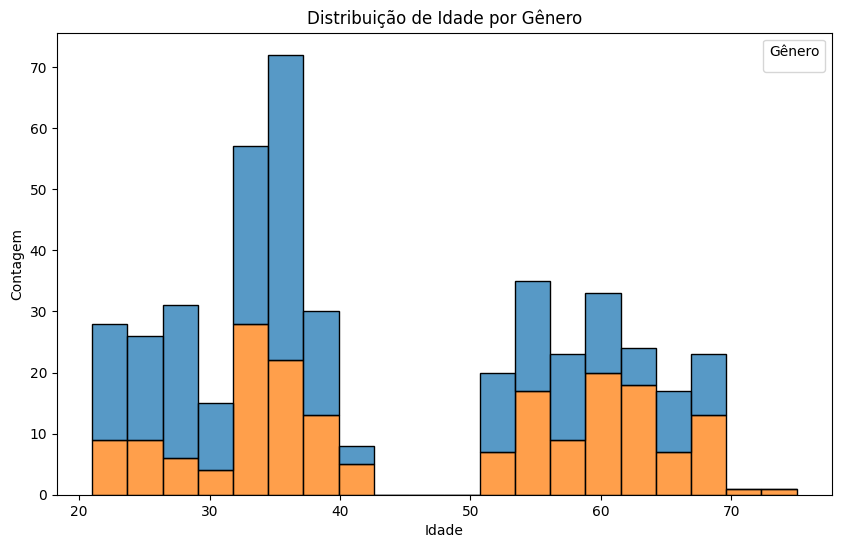

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Gender', multiple='stack', bins=20)
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Distribuição de Idade por Gênero')
plt.legend(title='Gênero')
plt.show()

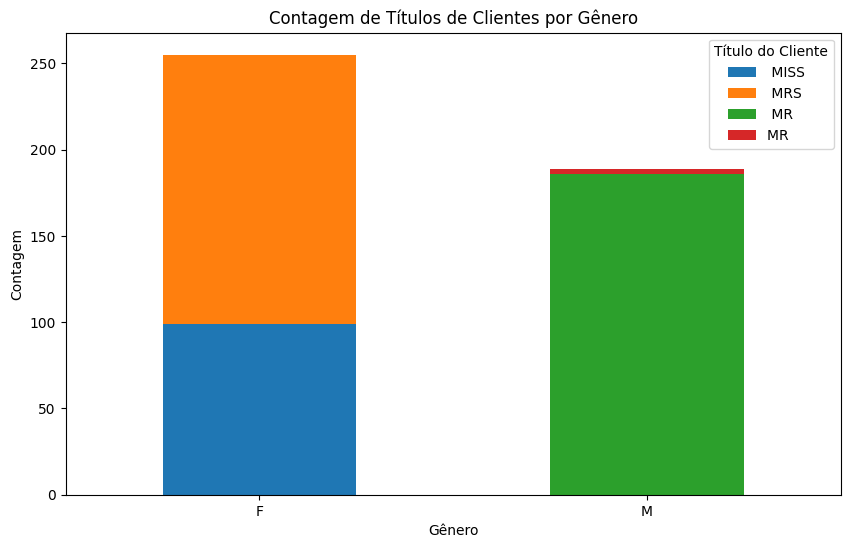

In [ ]:
gender_title_counts = df.groupby(['Gender', 'TitleCli']).size().unstack(fill_value=0)
gender_title_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Contagem de Títulos de Clientes por Gênero')
plt.xticks(rotation=0)
plt.legend(title='Título do Cliente')
plt.show()
